pandas分区间，算频率

https://blog.csdn.net/castingA3T/article/details/79075240

In [1]:
import pandas as pd
path='./catering_fish_congee.xls'
data=pd.read_excel(path,header=None,index_col=0)
data.index.name='日期'
data.columns=['销售额(元)']

In [8]:
data.head()

,销售额(元),区间
日期,,
2014-04-01,420,"[0, 500)"
2014-04-02,900,"[500, 1000)"
2014-04-03,1290,"[1000, 1500)"
2014-04-04,420,"[0, 500)"
2014-04-05,1710,"[1500, 2000)"


In [2]:
 xse=data['销售额(元)']
print(xse.max())
print(xse.min())
print(xse.max()-xse.min())

3960
45
3915


In [ ]:
fanwei=list(range(0,4500,500))
fenzu=pd.cut(xse.values,fanwei,right=False)#分组区间,长度91

In [10]:
fenzu

[[0, 500), [500, 1000), [1000, 1500), [0, 500), [1500, 2000), ..., [500, 1000), [500, 1000), [1000, 1500), [1000, 1500), [2500, 3000)]
Length: 91
Categories (8, interval[int64]): [[0, 500) < [500, 1000) < [1000, 1500) < [1500, 2000) < [2000, 2500) < [2500, 3000) < [3000, 3500) < [3500, 4000)]

In [3]:
print(fenzu.codes)#标签
print(fenzu.categories)#分组区间，长度8
pinshu=fenzu.value_counts()#series,区间-个数
print(pinshu.index)

[0 1 2 0 3 2 5 1 0 0 0 1 3 3 2 0 0 2 0 0 0 1 3 1 1 3 1 1 1 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 2 4 1 3 3 1 6 1 1 4 2 1 4 3 7 3 7 4 5 3 1 4 0 4 2 6 7
 6 4 3 1 2 0 2 0 6 2 4 1 1 1 2 2 5]
IntervalIndex([[0, 500), [500, 1000), [1000, 1500), [1500, 2000), [2000, 2500), [2500, 3000), [3000, 3500), [3500, 4000)]
              closed='left',
              dtype='interval[int64]')
CategoricalIndex([    [0, 500),  [500, 1000), [1000, 1500), [1500, 2000),
                  [2000, 2500), [2500, 3000), [3000, 3500), [3500, 4000)],
                 categories=[[0, 500), [500, 1000), [1000, 1500), [1500, 2000), [2000, 2500), [2500, 3000), [3000, 3500), [3500, 4000)], ordered=True, dtype='category')


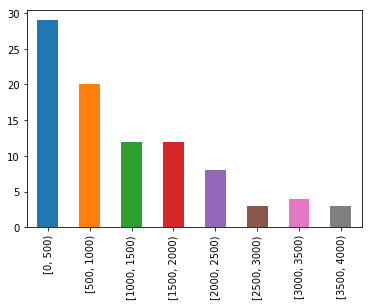

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
pinshu.plot(kind='bar')
#plt.text(0,29,str(29))

In [5]:
qujian=pd.cut(xse,fanwei,right=False)
data['区间']=qujian.values
data.groupby('区间').median()
data.groupby('区间').mean()#每个区间平均数
 
pinshu_df=pd.DataFrame(pinshu,columns=['频数'])
pinshu_df['频率f']=pinshu_df / pinshu_df['频数'].sum()
pinshu_df['频率%']=pinshu_df['频率f'].map(lambda x:'%.2f%%'%(x*100))
 
pinshu_df['累计频率f']=pinshu_df['频率f'].cumsum()
pinshu_df['累计频率%']=pinshu_df['累计频率f'].map(lambda x:'%.4f%%'%(x*100))

In [6]:
 
pinshu_df

,频数,频率f,频率%,累计频率f,累计频率%
"[0, 500)",29,0.318681,31.87%,0.318681,31.8681%
"[500, 1000)",20,0.219780,21.98%,0.538462,53.8462%
"[1000, 1500)",12,0.131868,13.19%,0.670330,67.0330%
"[1500, 2000)",12,0.131868,13.19%,0.802198,80.2198%
"[2000, 2500)",8,0.087912,8.79%,0.890110,89.0110%
"[2500, 3000)",3,0.032967,3.30%,0.923077,92.3077%
"[3000, 3500)",4,0.043956,4.40%,0.967033,96.7033%
"[3500, 4000)",3,0.032967,3.30%,1.000000,100.0000%


In [12]:
pinshu_df.to_html('区间统计.html')